<a href="https://colab.research.google.com/github/yusufdemir75/MachineLearning/blob/main/Swin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphanelerin yüklenmesi
!pip install torch torchvision transformers scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
#google drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

# Resimlerin bulunduğu klasör
data_dir = '/content/drive/MyDrive/sunum/data'

# Verileri işlemek için dönüşüm işlemleri
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Verisetimizi yükleme
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Verisetini eğitim ve doğrulama setlerine bölüyoruz
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# DataLoader'ları oluşturun
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
from transformers import SwinForImageClassification, AutoImageProcessor
import torch

# Sınıf sayısı
num_classes = 7

# Swin modelini ve feature extractor'ı yükleme
model_name = 'microsoft/swin-base-patch4-window7-224'
model = SwinForImageClassification.from_pretrained(model_name, num_labels=num_classes, ignore_mismatched_sizes=True)
feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# GPU kullanımı için modeli CUDA'ya taşımak
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfO

Epoch 1/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.9494, Train Accuracy: 0.6608
Validation Loss: 0.5460, Validation Accuracy: 0.7991
Epoch 2/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.3424, Train Accuracy: 0.8889
Validation Loss: 0.4272, Validation Accuracy: 0.8523
Epoch 3/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.1407, Train Accuracy: 0.9593
Validation Loss: 0.3917, Validation Accuracy: 0.8746
Epoch 4/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.0692, Train Accuracy: 0.9854
Validation Loss: 0.4118, Validation Accuracy: 0.8714
Epoch 5/5


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Train Loss: 0.0422, Train Accuracy: 0.9904
Validation Loss: 0.4030, Validation Accuracy: 0.8820


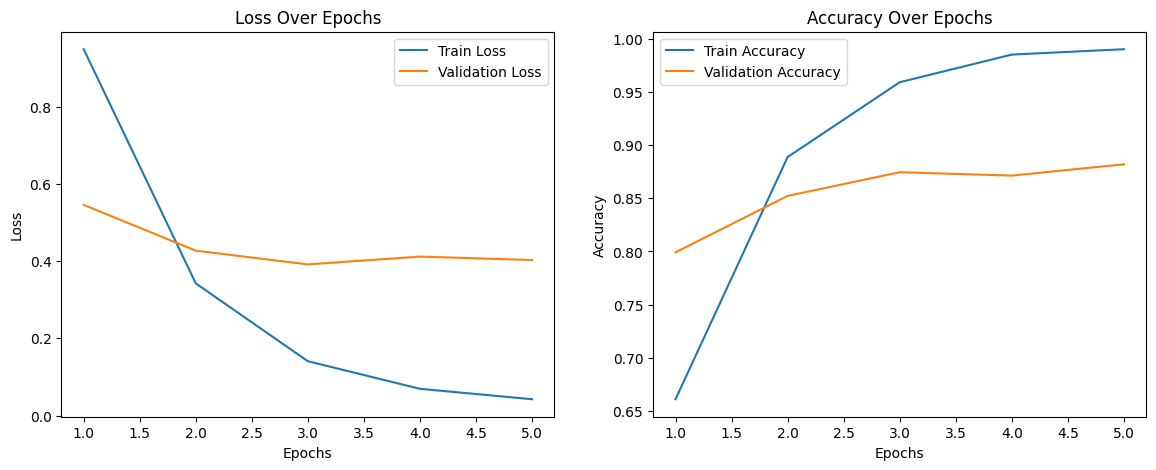

In [ ]:
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Hiperparametreleri belirleyin
num_epochs = 5
learning_rate = 5e-5

# Optimizatörü ve öğrenme oranı çizelgesini oluşturun
optimizer = AdamW(model.parameters(), lr=learning_rate)
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_epochs * len(train_loader)
)

# Kayıp fonksiyonunu tanımlayın
loss_fn = torch.nn.CrossEntropyLoss()

# Eğitim ve doğrulama loss ve accuracy değerlerini depolayacak listeler
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Modeli eğitin
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss = 0
    train_correct = 0
    val_loss = 0
    val_correct = 0

    # Eğitim aşaması
    model.train()
    for batch in tqdm(train_loader):
        pixel_values = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values, labels=labels)
        loss = loss_fn(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        train_loss += loss.item() * pixel_values.size(0)
        train_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Doğrulama aşaması
    model.eval()
    with torch.no_grad():
        for batch in tqdm(val_loader):
            pixel_values = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(pixel_values, labels=labels)
            loss = loss_fn(outputs.logits, labels)

            val_loss += loss.item() * pixel_values.size(0)
            val_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = val_correct / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Loss ve Accuracy değerlerini grafik olarak gösterme
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

100%|██████████| 30/30 [00:15<00:00,  1.95it/s]


Accuracy: 0.8820403825717322
Precision: 0.8824740609507418
Recall: 0.8820403825717322
F1 Score: 0.8821080388908323
Matthews Correlation Coefficient: 0.8620263678058995
ROC AUC: 0.9874684150854869


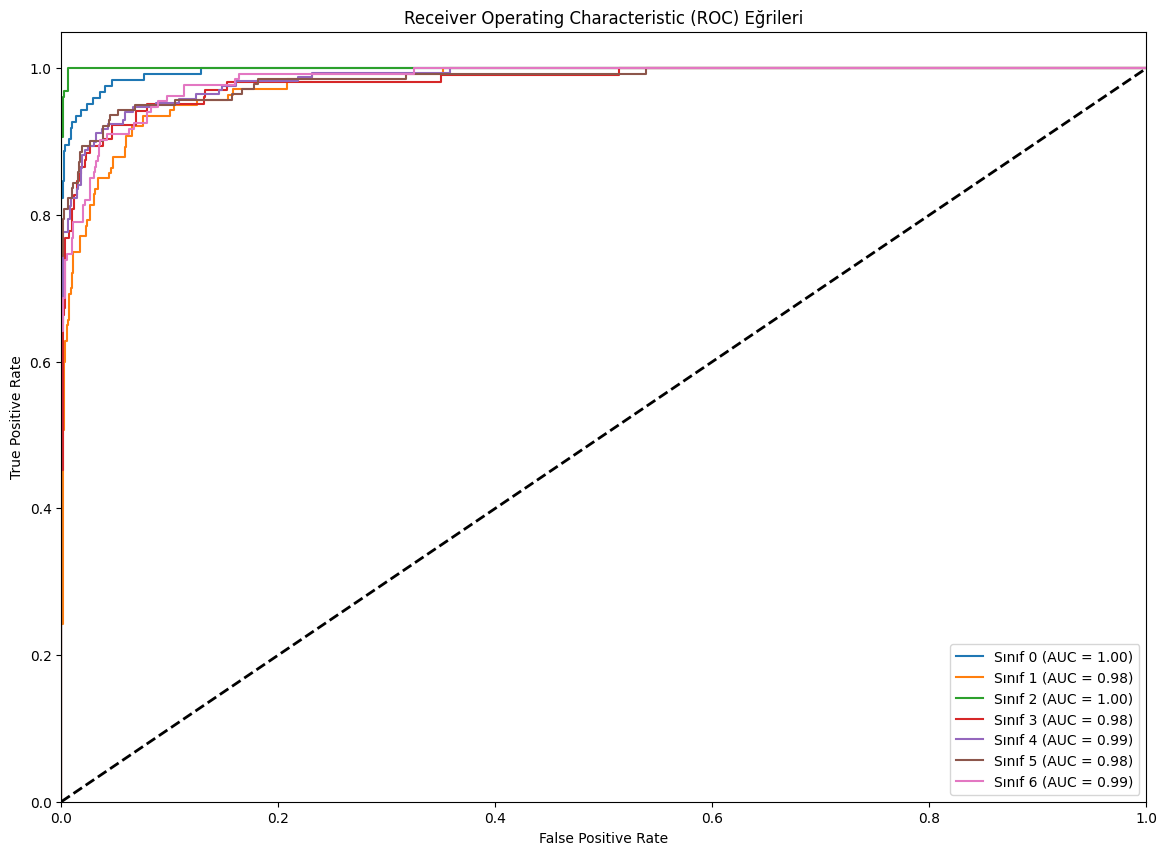

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, matthews_corrcoef
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Model değerlendirilmesi
model.eval()
all_predictions = []
all_labels = []
all_logits = []

for batch in tqdm(val_loader):
    pixel_values = batch[0].to(device)
    labels = batch[1].to(device)

    with torch.no_grad():
        outputs = model(pixel_values, labels=labels)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_logits.extend(F.softmax(logits, dim=-1).cpu().numpy())  # softmax uygulanması

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
mcc = matthews_corrcoef(all_labels, all_predictions)

# ROC AUC hesaplama
all_logits = np.array(all_logits)
roc_auc = roc_auc_score(all_labels, all_logits, multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC: {roc_auc}")

# ROC eğrileri için kod
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
n_classes = num_classes

# Her sınıf için ROC eğrisi hesaplama
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(all_labels) == i, all_logits[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Her sınıf için ROC eğrilerini çizme
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (AUC = {roc_auc_dict[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Eğrileri')
plt.legend(loc='lower right')
plt.show()
